In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns

In [5]:
df=pd.read_csv(r"C:\Users\Surup Chakrabarty\data\Festival_Sales_Data.csv",encoding='unicode_escape')
df.shape

(11251, 15)

In [13]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [15]:
#data cleaning deleting unnecessary columns
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [16]:
#checking the number of null values columnwise
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [17]:
#drop the null values
df.dropna(inplace=True)

In [18]:
#checking whether null values are removed
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [19]:
#change data type
df['Amount']=df['Amount'].astype('int')

# Exploratory Data Analysis

# Gender

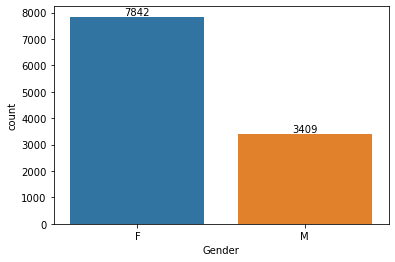

In [7]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)


In [8]:
df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

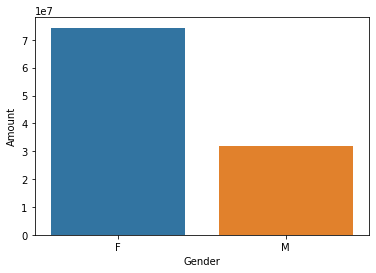

In [9]:
# Creating barplot of gender vs amount 
x=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=x)

From the above graphs we can see that female buyers are more than males and purchasing power of females are greater than that of males

# Age

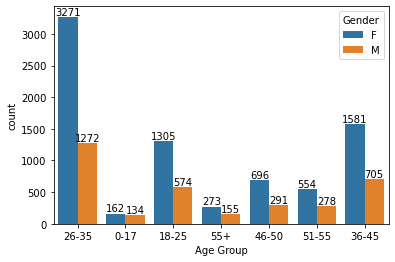

In [10]:
ax=sns.countplot(x='Age Group',hue='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)


<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

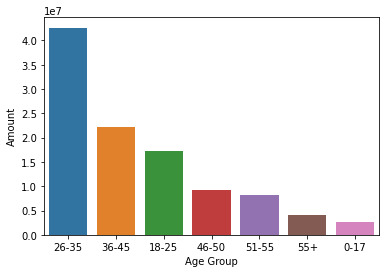

In [11]:
age_data=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=age_data)

From the above graphs we can say that most amount is spend by the women of age group 26 to 35 years. 

# State

<AxesSubplot:xlabel='State', ylabel='Orders'>

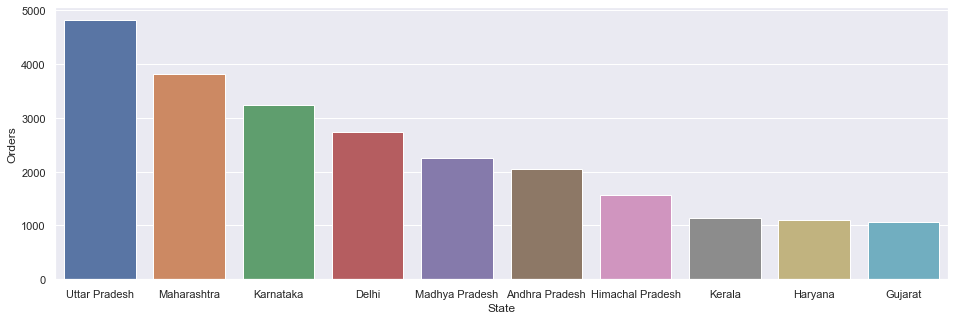

In [14]:
state_data=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=state_data, x='State',y='Orders')

<AxesSubplot:xlabel='State', ylabel='Amount'>

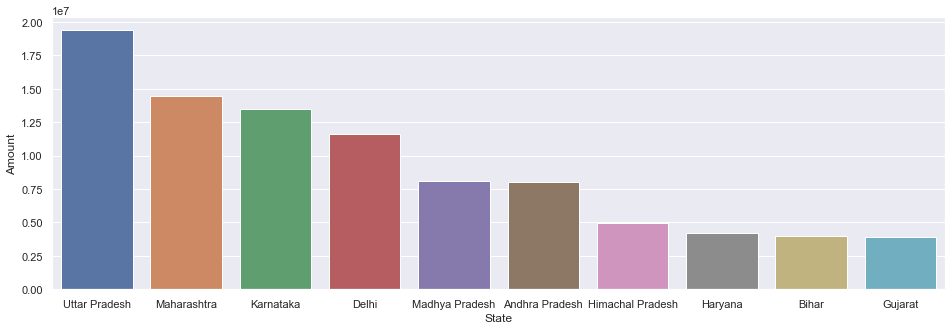

In [15]:
# Total sales from top 10 states
state_data=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(data=state_data, x='State',y='Amount')

From the above graphs we can say most of the orders and most amount spent sre from Uttar Pradesh, Maharashtra and Karnataka

# Maritial Status

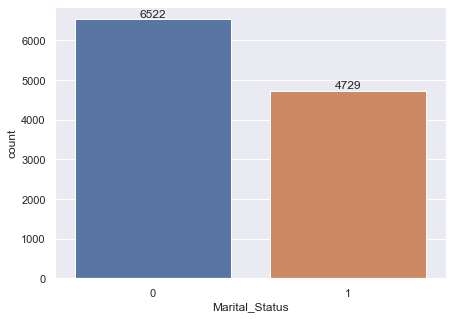

In [17]:
ax=sns.countplot(data=df,x='Marital_Status')
sns.set(rc={'figure.figsize':(2,5)})
for bars in ax.containers:
    ax.bar_label(bars)


<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

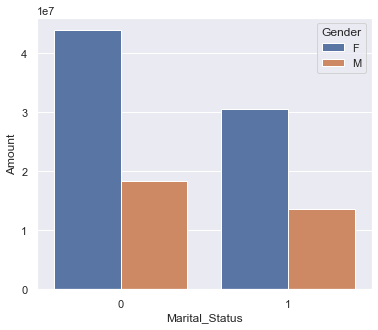

In [21]:
maritial_data=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data=maritial_data,x='Marital_Status',y='Amount',hue='Gender')


From the above graphs we can say that most of the amount is spend by women who are married

# Occupation

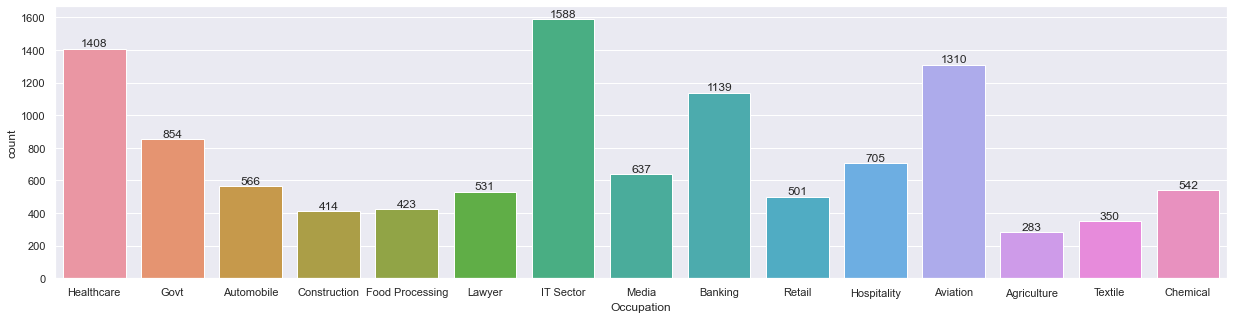

In [23]:
sns.set(rc={'figure.figsize':(21,5)})
ax=sns.countplot(data=df,x='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

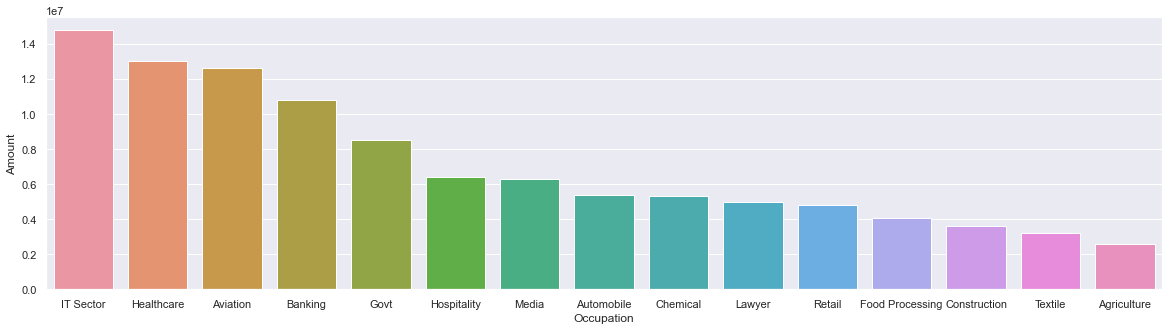

In [24]:
occupation_data=df.groupby(['Occupation'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data=occupation_data,x='Occupation',y='Amount')


# Product Category

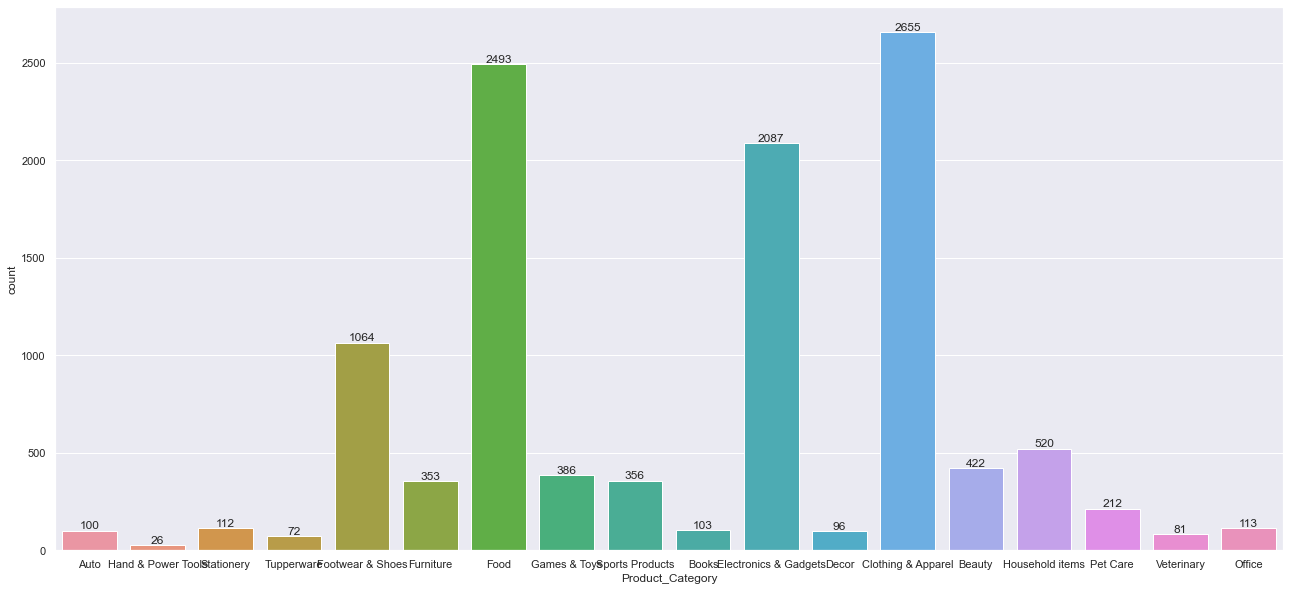

In [26]:
sns.set(rc={'figure.figsize':(22,10)})
ax=sns.countplot(data=df,x='Product_Category')
for bars in ax.containers:
    ax.bar_label(bars)


<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

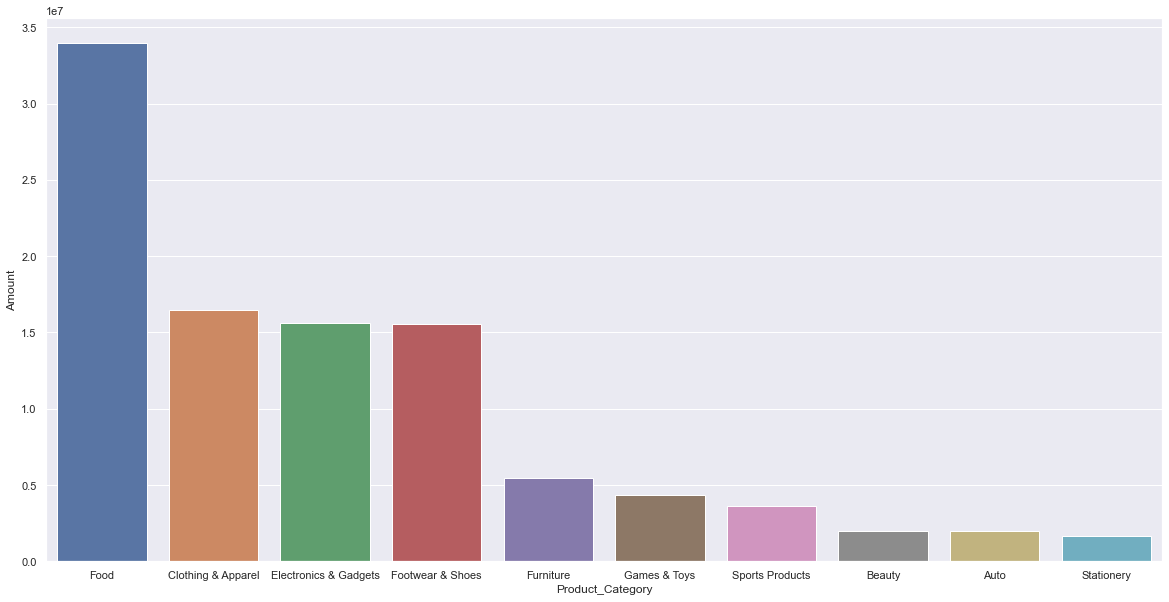

In [30]:
product_data=df.groupby(['Product_Category'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=product_data,x='Product_Category',y='Amount')


From the above graph we can say that most of the amount is spent in Food, Clothing and Electronics Gadgets

# Top Selling Product

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

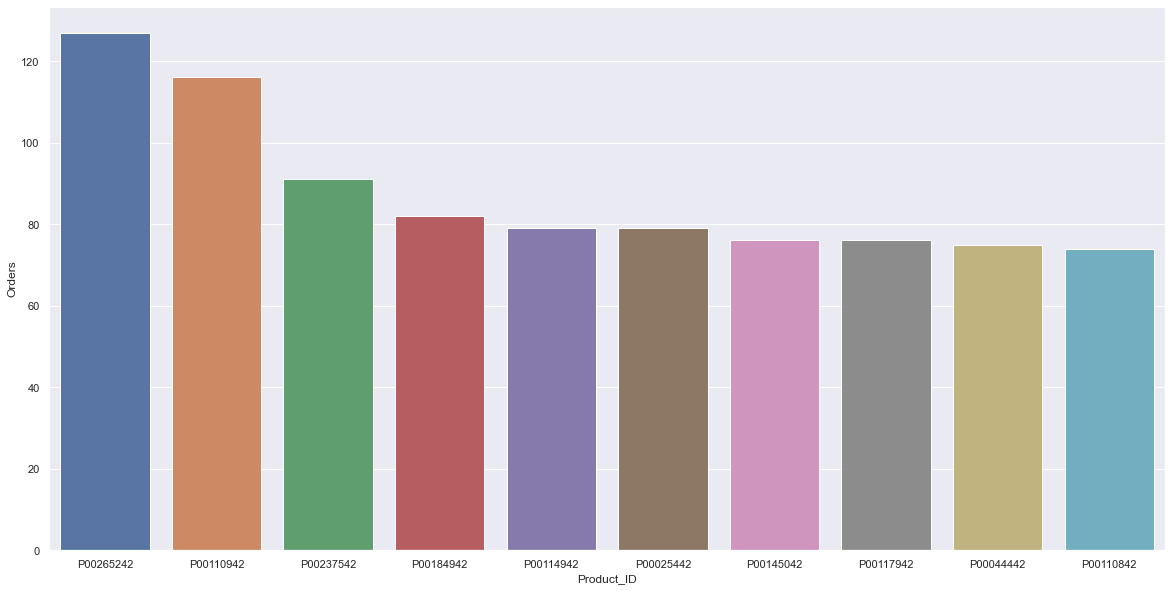

In [32]:
product_data=df.groupby(['Product_ID'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(data=product_data,x='Product_ID',y='Orders')

# Conclusion

Married Women in age group 26-35 years from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category